# Example R boxplots with the Cars93 dataset

Boxplots, or box-and-whisker plots, display a visualization of basic descriptive statistics a dataset. Features of boxplots: 
* Q1, Q3 (quartiles);
* Mean;
* min, max (range);
* and outliers (as circles)

To plot, specify the formula: the dataset, and the groups into which to split the dataset.

for info type:

> boxplot

The example barplots in this Notebook use the base R plotting routine, barplot().

In [1]:
# import the R library called "MASS"
library(MASS)

# use cr to indicate the Cars93 data frame:
cr = Cars93

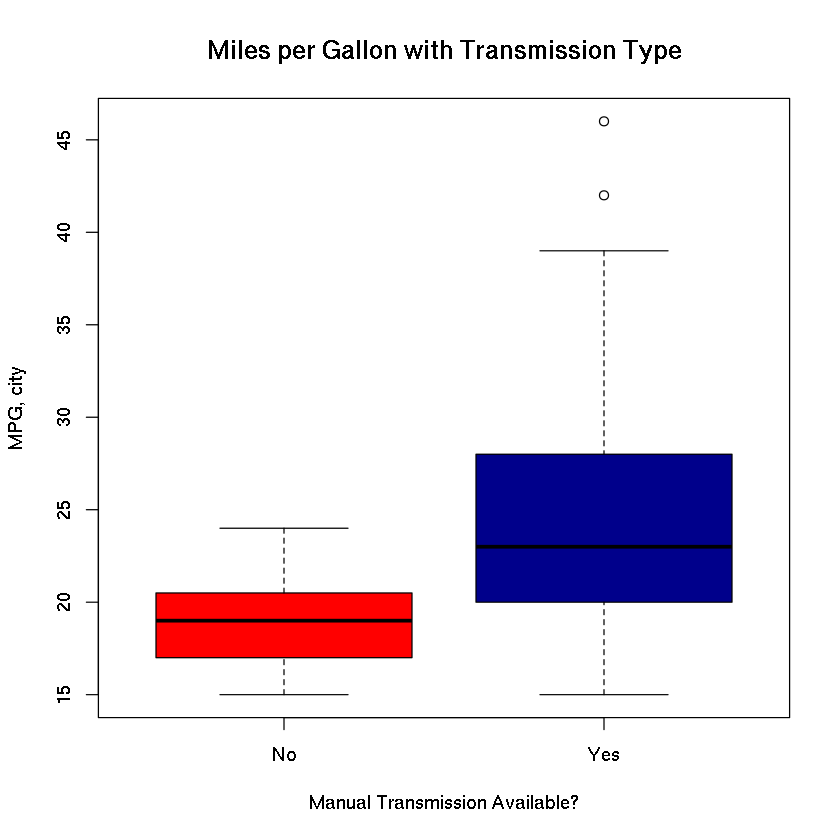

In [2]:
# Do the manual transmission cars in this dataset get better gas mileage?

# divide MPG.city data into groups by Man.trans
boxplot(formula=MPG.city~Man.trans.avail, 
        data=cr, 
        xlab="Manual Transmission Available?", 
        ylab="MPG, city",
        col=c("red", "darkblue"))
title("Miles per Gallon with Transmission Type")

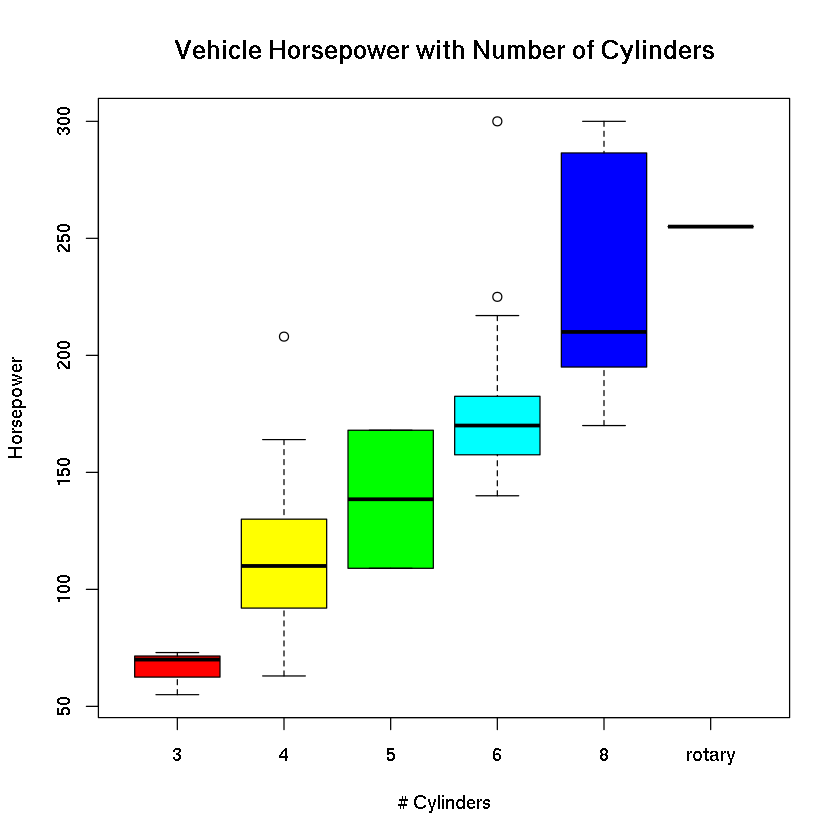

In [3]:
# What is the relationship between horsepower and number of cylinders?

colors=rainbow(length(levels(cr$Cylinders)))
boxplot(formula=Horsepower~Cylinders, # divide Horsepower data into groups by # Cylinders
        data=cr,  
        xlab="# Cylinders", 
        ylab="Horsepower",
        col=colors)
title("Vehicle Horsepower with Number of Cylinders")

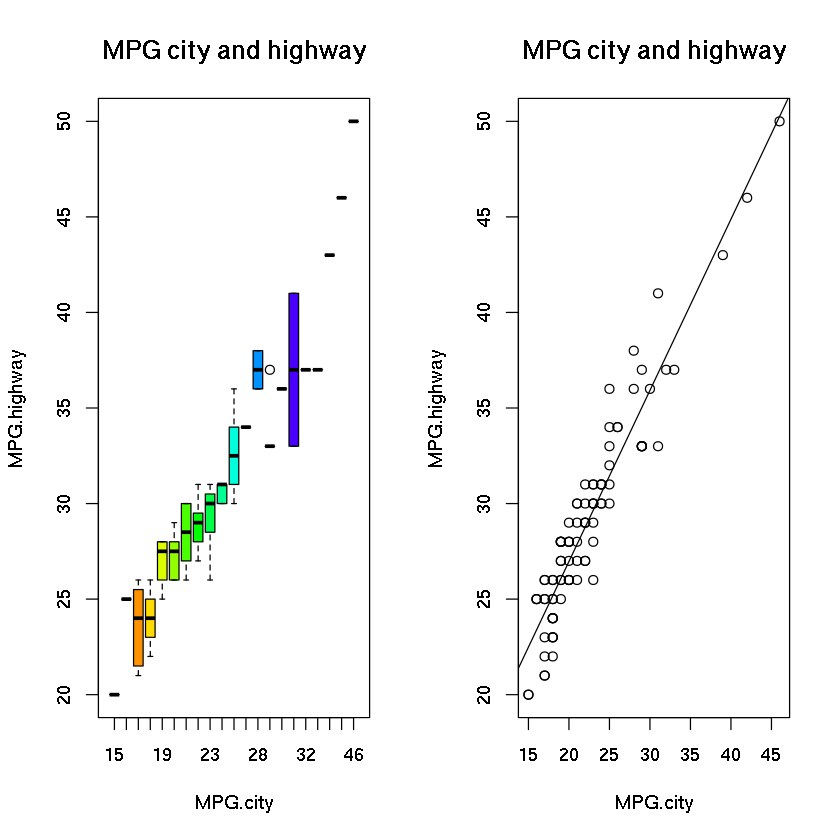

In [4]:
# --------------  MPG city and highway: as a box plot --------------

# Since MPG is a numeric value, we can do statistics on it.
# Hence we get a boxplot. 

par(mfrow=c(1,2)) # place two plots on a "page"

xl = "MPG.city"
yl="MPG.highway"

colors=rainbow(length(levels(factor(cr$MPG.city))))
boxplot(formula=MPG.highway~MPG.city, 
        data=cr, 
        xlab=xl, 
        ylab=yl,
        col=colors)
title("MPG city and highway")

# On the right, the same MPG data is represented in a scatterplot. Which is more informative, scatter or box?
xl = "MPG.city"
yl="MPG.highway"

plot(formula=MPG.highway~MPG.city, 
     data=cr, 
     xlab=xl, 
     ylab=yl,
     pch=1)
title("MPG city and highway")

# Least-squares fit on the scatterplot:
fit2=lm(cr$MPG.highway~cr$MPG.city)
abline(fit2)

par(mfrow=c(1,1)) # restore default: one plot per page


In [5]:
# Which cars do better than 40 MPG in city driving?

cr[cr$MPG.city>40,
        c("Make","MPG.city","MPG.highway","Weight","Passengers")]

,Make,MPG.city,MPG.highway,Weight,Passengers
39,Geo Metro,46,50,1695,4
42,Honda Civic,42,46,2350,4


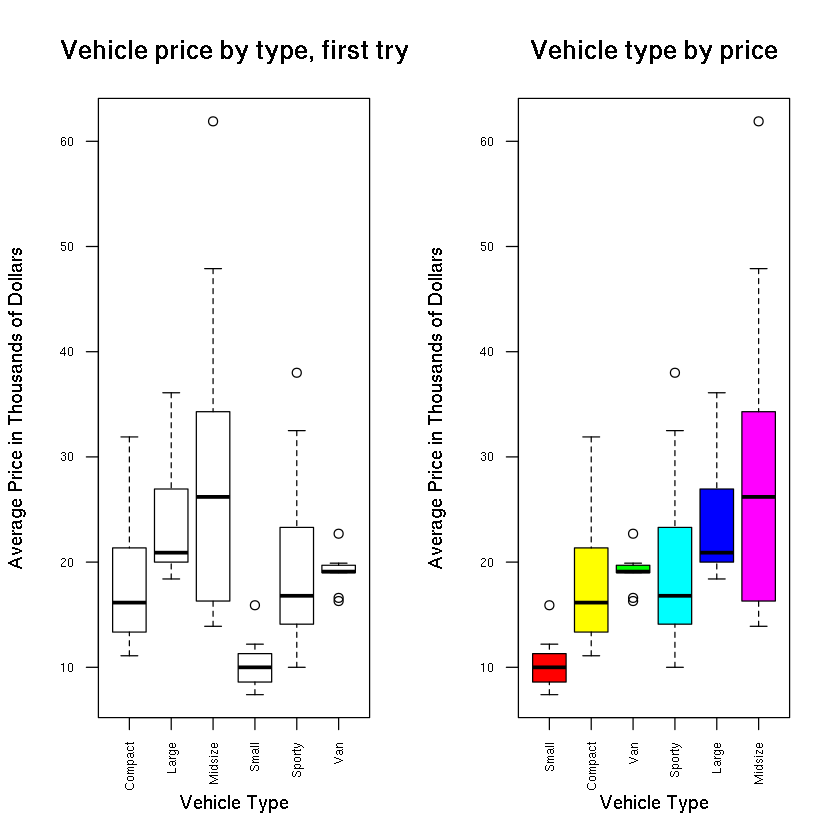

In [6]:
# --------- Vehicle Price by Type -------------

# boxplots of vehicle price by type. Ordering the categorical variables for clarity.

colors=rainbow(length(levels(cr$Type)))
par(mfrow=c(1,2)) # two plots on a "page"

# notice that the categorical variables are ordered alphabetically:
boxplot(formula=Price~Type, 
        data=cr, 
        cex.axis=0.6,
        las=2,        
        xlab='Vehicle Type', 
        ylab='Average Price in Thousands of Dollars')
title("Vehicle price by type, first try")

# using a reorder() call, we can order the vehicle types by price instead of alphabetical order:

type=reorder(cr$Type,cr$Price)
colors=rainbow(length(levels(cr$Type)))
boxplot(formula=Price~type, 
        data=cr, 
        cex.axis=0.6,
        las=2,        
        xlab='Vehicle Type', 
        ylab='Average Price in Thousands of Dollars',
        col=colors)
title("Vehicle type by price")

par(mfrow=c(1,1)) # restore default: one plot per page


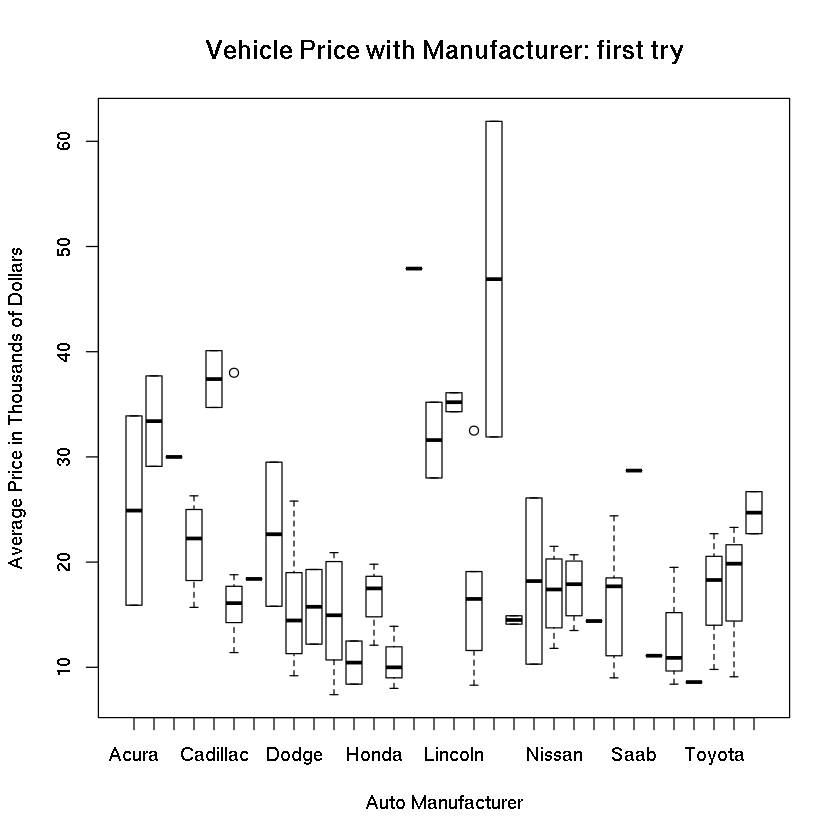

In [7]:
# --- Price with Manufacturer ----
#
# appearance tips:
#     reorder the categorical x value by the y value.
#
#     rotate the x axis label 90 degrees; use las
#         The las setting sets the axis label style with respect to the axis: 
#         0=parallel, 1=all horizontal, 2=all perpendicular to axis, 3=all vertical
#
#     scale the axis labels by 60% of default text size; use cex.axis
#
# here's our first try:
#   notice that:
#       hard to interpret the graph
#       some x axis labels are missing: what's the one with the huge quartile extent?
#       

xl = "Auto Manufacturer"

boxplot(formula=Price~Manufacturer, 
        data=cr, 
        xlab=xl, 
        ylab="Average Price in Thousands of Dollars")

title("Vehicle Price with Manufacturer: first try")

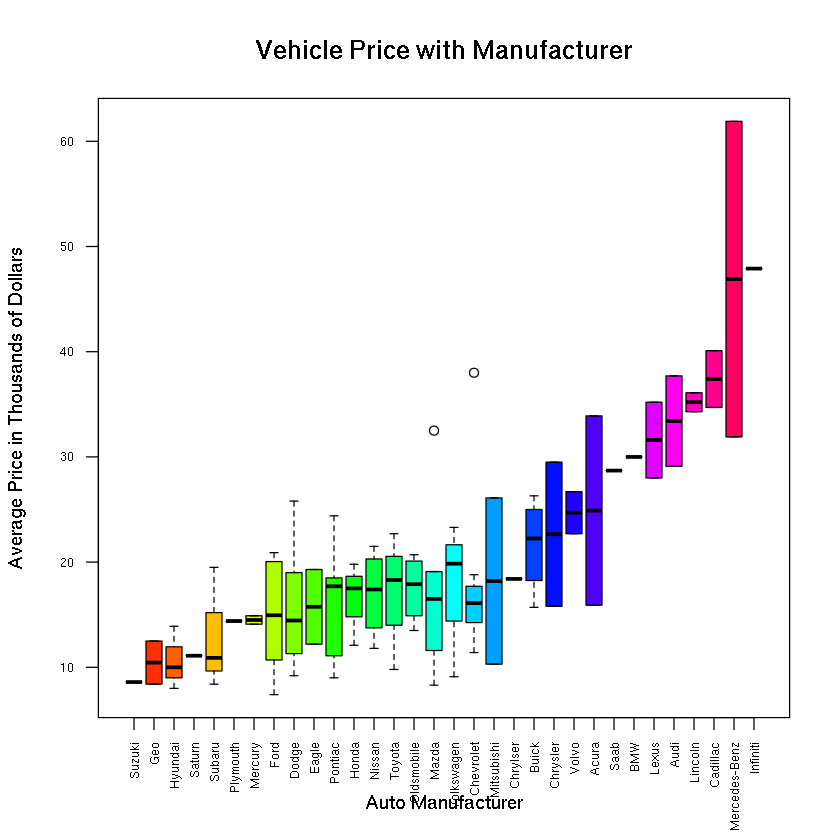

In [8]:
# make some changes to improve the information conveyed by these plots:
#   - reorder the category "Manufacturer" (x axis) by the y axis quantity
#   - scale and rotate x axis labels
#   - colors for the boxes

# color boxes by Manufacturer
colors=rainbow(length(levels(cr$Manufacturer)))

# Vehicle Price by Manufacturer
mp=reorder(cr$Manufacturer,cr$Price)
xl = "Auto Manufacturer"
boxplot(formula=Price~mp, 
        data=cr, 
        xlab=xl, 
        ylab="Average Price in Thousands of Dollars", 
        cex.axis=0.6,
        las=2,
        col=colors)

title("Vehicle Price with Manufacturer")


In [9]:
# ---------- box plots with auto type ---------------

# what are the available auto types?
levels(cr$Type)

# What are their abundances in the dataset?
table(cr$Type)

[1] "Compact" "Large"   "Midsize" "Small"   "Sporty"  "Van"


Compact   Large Midsize   Small  Sporty     Van 
     16      11      22      21      14       9 

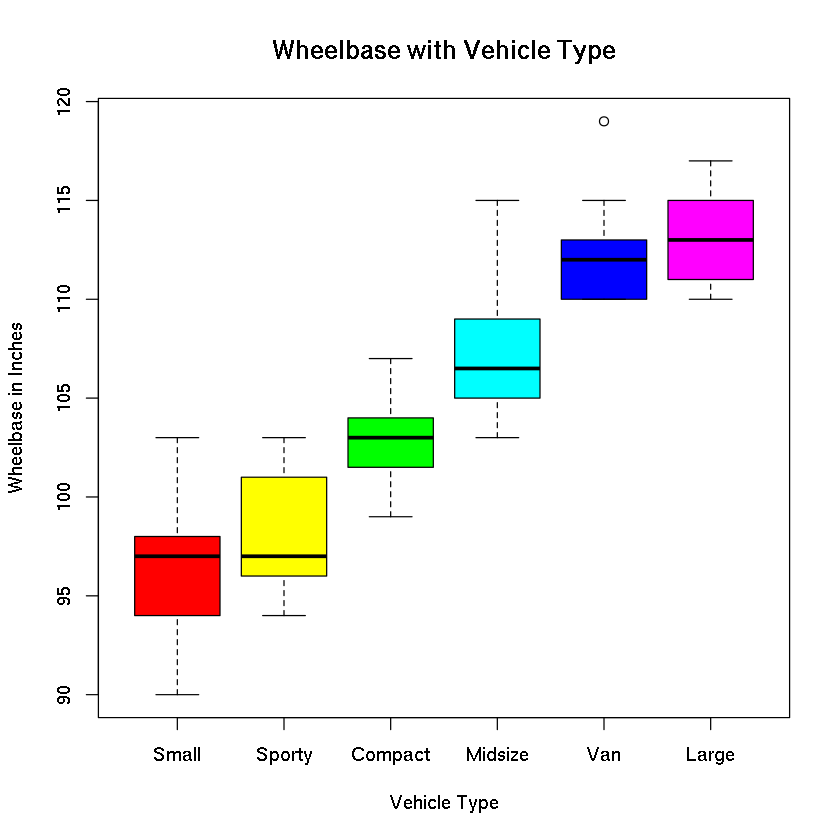

In [10]:
# -------- Vehicle wheelbase with type --------

xl="Vehicle Type"
tw=reorder(cr$Type,cr$Wheelbase) # order type category by wheelbase
colors=rainbow(length(levels(cr$Type)))

boxplot(formula=Wheelbase~tw, 
        data=cr, 
        xlab=xl, 
        ylab="Wheelbase in Inches",
        col=colors)

title(paste("Wheelbase with",xl))

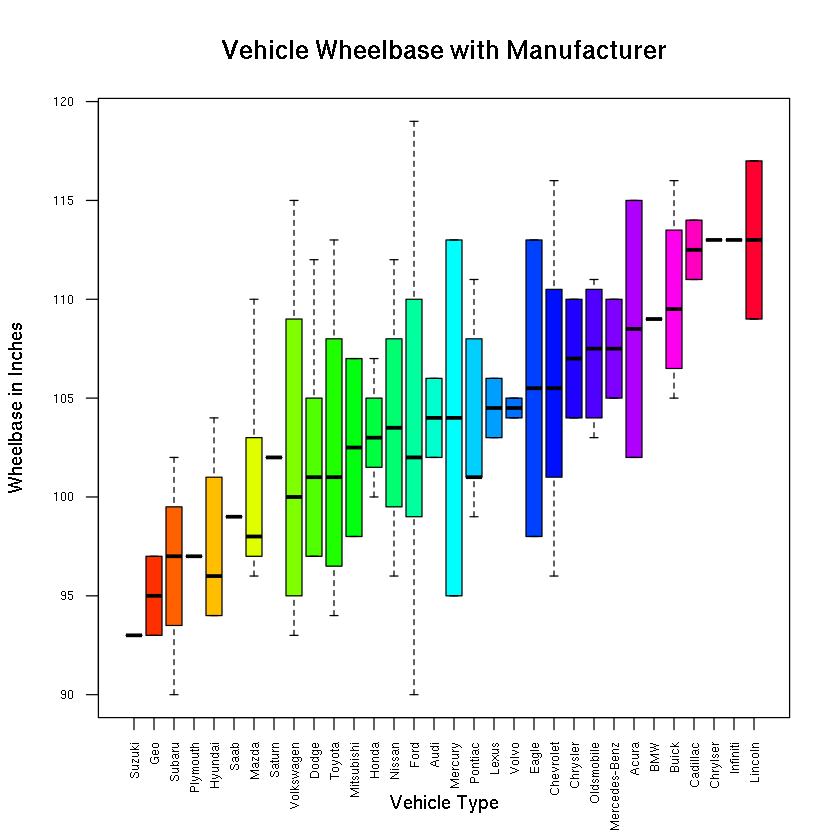

In [11]:
# --------------- Looking into Wheelbase ------------------

# Vehicle Wheelbase by Manufacturer
colors=rainbow(length(levels(cr$Manufacturer)))
mw=reorder(cr$Manufacturer,cr$Wheelbase)

boxplot(formula=Wheelbase~mw, 
        data=cr, 
        xlab=xl, 
        ylab="Wheelbase in Inches",
        cex.axis=0.6,
        las=2,
        col=colors)

title("Vehicle Wheelbase with Manufacturer")


In [12]:
# Question: what's the story with some of these wheelbases? 
# Ford, for instance, has a huge range. Let's look:

ford=cr[cr$Manufacturer=="Ford",]

# Ford wheelbases really do range from 90 to 119 inches!
summary(ford$Wheelbase)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   90.0    99.5   102.0   103.9   108.0   119.0 

In [13]:
# calling factor() enables us to strip unused levels from Make and Type variables
# Use a call to the factor() function to lose those unused levels for the Ford vehicles.
#
# http://www.r-bloggers.com/drop-unused-factor-levels/

ford <- data.frame(Make=factor(ford$Make), 
                  Type=factor(ford$Type), 
                  Model=factor(ford$Model),
                  Wheelbase=ford$Wheelbase) 
summary(ford)

                  Make        Type              Model     Wheelbase    
 Ford Aerostar      :1   Compact:1   Aerostar      :1   Min.   : 90.0  
 Ford Crown_Victoria:1   Large  :1   Crown_Victoria:1   1st Qu.: 99.5  
 Ford Escort        :1   Midsize:1   Escort        :1   Median :102.0  
 Ford Festiva       :1   Small  :2   Festiva       :1   Mean   :103.9  
 Ford Mustang       :1   Sporty :2   Mustang       :1   3rd Qu.:108.0  
 Ford Probe         :1   Van    :1   Probe         :1   Max.   :119.0  
 (Other)            :2               (Other)       :2                  

In [14]:
# here's another way to do the same subsetting operation, with better control of column names:
# # refer here, use the factor() call to lose extra levels.
# # http://www.r-bloggers.com/drop-unused-factor-levels/

model=factor(cr[cr$Manufacturer=="Ford","Model"]) # was a factor
type=factor(cr[cr$Manufacturer=="Ford","Type"])   # was a factor
wheelbase=cr[cr$Manufacturer=="Ford","Wheelbase"] # was an int


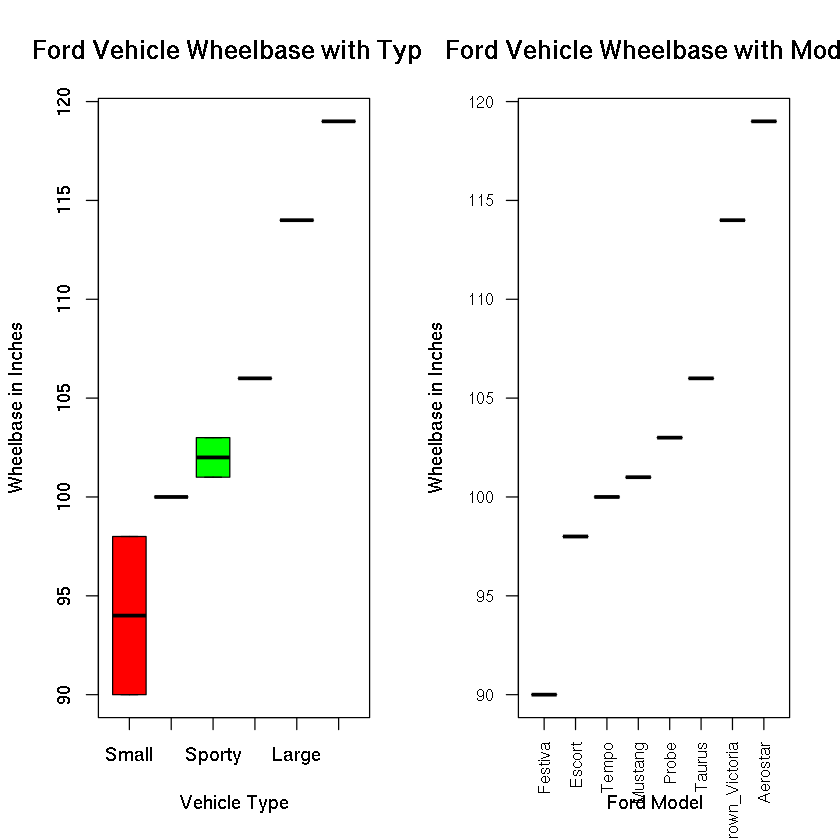

In [15]:
# here we could make a data frame containing whatever we want:
# ford = data.frame(model, type, wheelbase)

# here's a Ford Wheelbase boxplot with Type:
par(mfrow=c(1,2))

colors=rainbow(length(levels(type)))
mw=reorder(type,wheelbase)
boxplot(formula=wheelbase~mw, 
        data=cr, 
        xlab=xl, 
        ylab="Wheelbase in Inches",
        col=colors)
title("Ford Vehicle Wheelbase with Type")

# with Model, it's still essentially a boxplot, since x is categorical:
mw=reorder(model,wheelbase)
plot(formula=wheelbase~mw, 
        data=cr, 
        xlab="Ford Model", 
        cex.axis=0.8,
        las=2,     
        ylab="Wheelbase in Inches",
        pch=1) # pch gets ignored
title("Ford Vehicle Wheelbase with Model")

par(mfrow=c(1,1))

Warning message in bxp(structure(list(stats = structure(c(1965, 2240, 2345, 2495, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

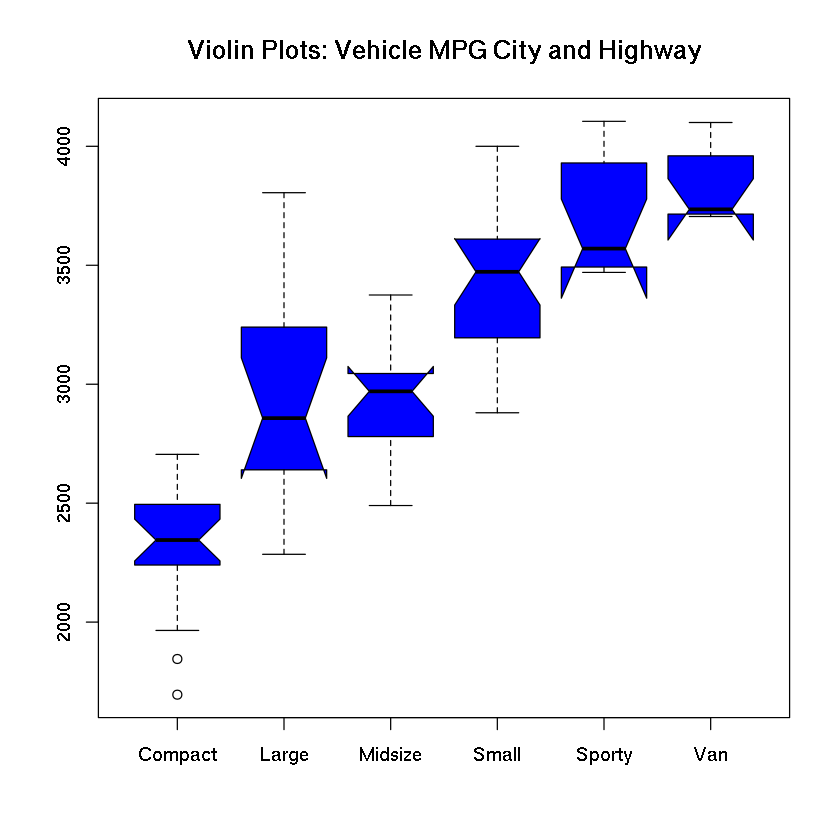

In [18]:
# -------- Extra stuff: Violin Plot ----------

# A violin plot is a combination of a box plot and a kernel density plot. 
# Specifically, it starts with a box plot. It then adds a rotated kernel 
# density plot to each side of the box plot.

# Here is a violin plot of Weight and Type.
#library(vioplot)

# We can mock up a violin plot using a boxplot with the optional argument notch=TRUE
x1 <- cr$Weight[cr$Type=="Small"]
x2 <- cr$Weight[cr$Type=="Sporty"]
x3 <- cr$Weight[cr$Type=="Compact"]
x4 <- cr$Weight[cr$Type=="Midsize"]
x5 <- cr$Weight[cr$Type=="Large"]
x6 <- cr$Weight[cr$Type=="Van"]

#vioplot(x1,  x2,  x3, x4, x5, x6, names=levels(cr$Type),
#        col="blue")
boxplot(x1,  x2,  x3, x4, x5, x6, 
        names=levels(cr$Type),
        col="blue",
        notch=TRUE)

title("Violin Plots: Vehicle MPG City and Highway")
#detach("package:vioplot", unload=TRUE)